## Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Exploratory Data Analysis

In [2]:
df = pd.read_csv('../artifacts/WrangledData.csv')
df.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6123.547647,LEO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


1. To see how the `FlightNumber` (indicating the continuous launch attempts) and `Payload` variables would affect the launch outcome, the `FlightNumber` vs. `PayloadMass` and overlay the outcome of the launch can be plotted. 

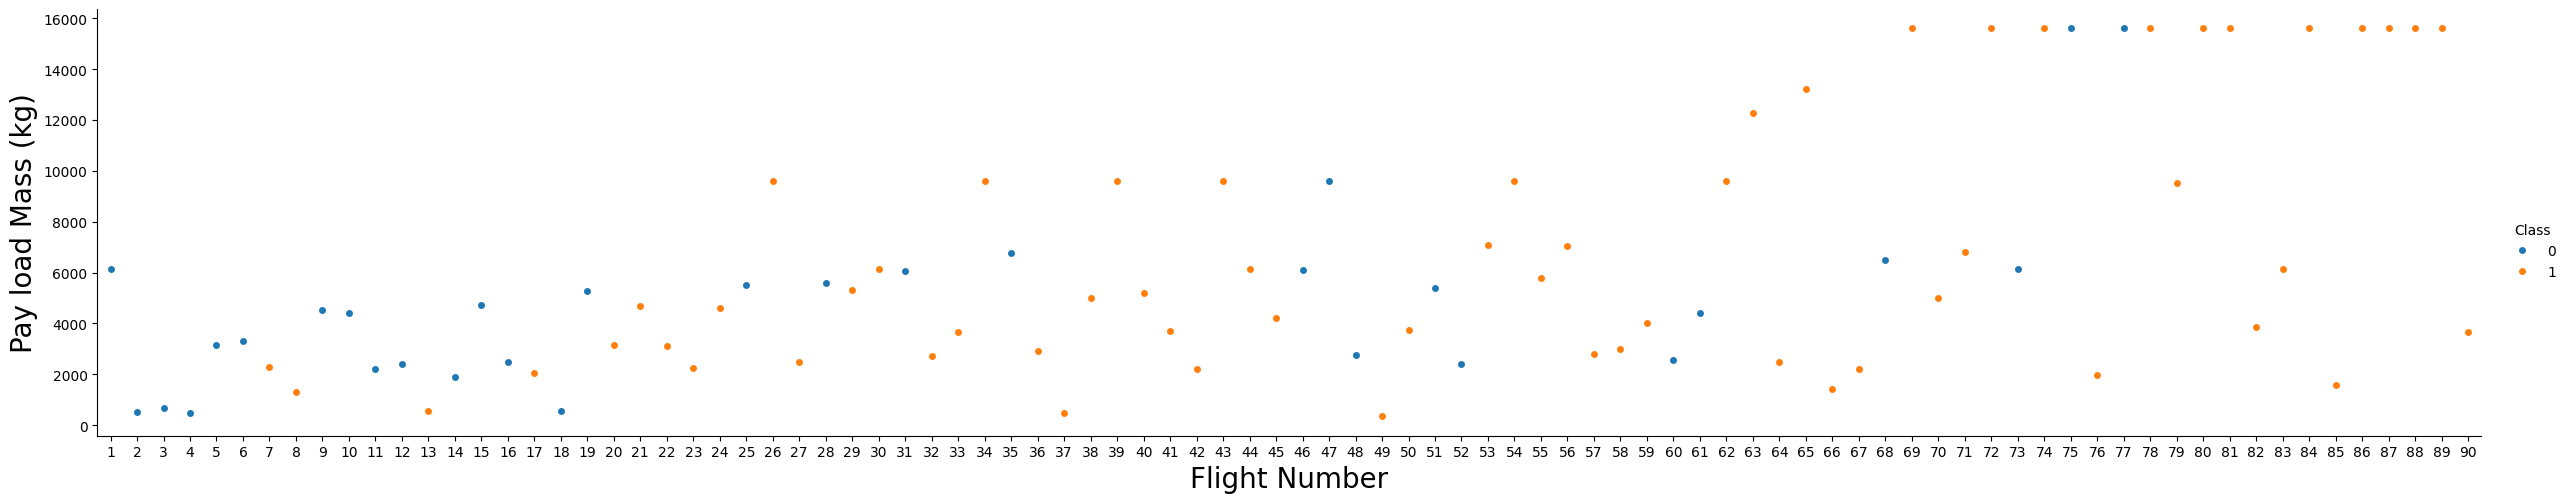

In [3]:
sns.catplot(y='PayloadMass', x='FlightNumber', hue='Class', data=df, aspect = 5)
plt.xlabel('Flight Number',fontsize=20)
plt.ylabel('Pay load Mass (kg)',fontsize=20)
plt.show()

It can be seen that as the flight number increases, the first stage is more likely to land successfully. The payload mass is also important; it seems the more massive the payload, the less likely the first stage will return.

2. To show that different `LaunchSite` have different success rates, a scatter plot of the `FlightNumber` and `LaunchSite` can be created with a cue to the `Class` value

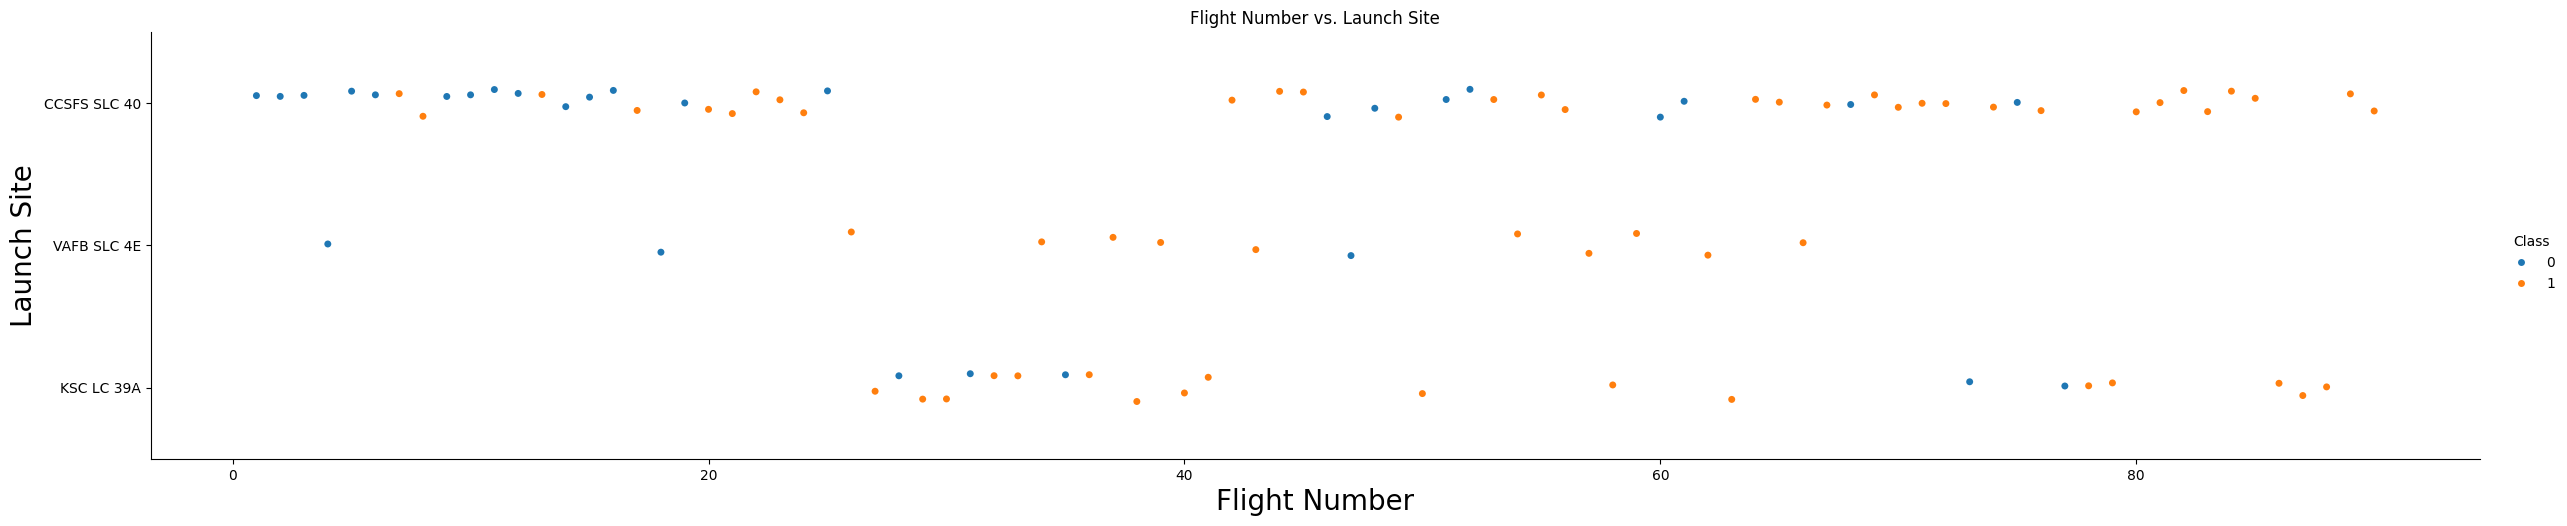

In [4]:
sns.catplot(x='FlightNumber', y='LaunchSite', hue='Class', data=df, aspect = 5)
plt.title('Flight Number vs. Launch Site')
plt.xlabel('Flight Number',fontsize=20)
plt.ylabel('Launch Site',fontsize=20)
plt.show()

Most launches were conducted at CCSFS SLC 40, followed by KSC LC 39A and VAFB SLC 4E, with CCSFS SLC 40 showing a relatively higher frequency of launches. `CCAFS LC-40` has a success rate of 60%, while `KSC LC-39A` and `VAFB SLC 4E` has a success rate of 77%.

3. To show whether the the `PayloadMass` and `LaunchSite` location is related, a scatter chart of the `LaunchSite` vs `PayloadMass` can be plotted, with hue of the `Class` value

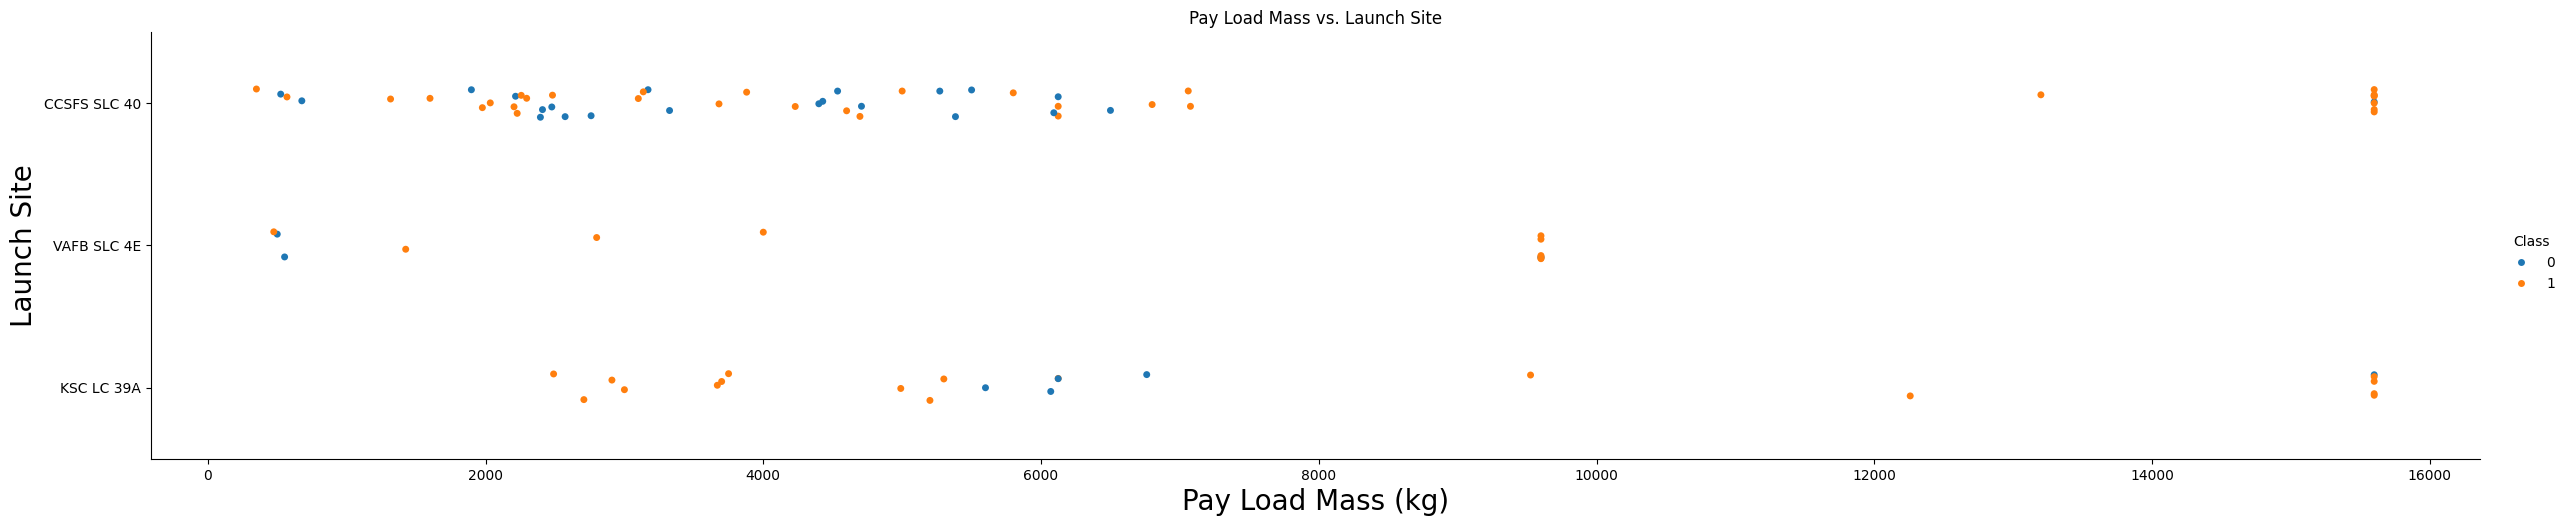

In [5]:
sns.catplot(x='PayloadMass', y='LaunchSite', hue='Class', data=df, aspect = 5)
plt.title('Pay Load Mass vs. Launch Site')
plt.xlabel('Pay Load Mass (kg)',fontsize=20)
plt.ylabel('Launch Site',fontsize=20)
plt.show()

The scatter plot shows that `CCSFS SLC 40` handled most of the launches across a wide range of payload masses, especially in the lower to mid-range payloads (below 10000 kg). `KSC LC 39A` is associated with heavier payloads, with several launches exceeding 10000 kg, mostly showing successful outcomes. In contrast, `VAFB SLC 4E` primarily managed lighter payloads and had fewer overall launches compared to the other sites.

4. A bar plot can be created to check the relationship between success rate (`Class`) and `Orbit` type.

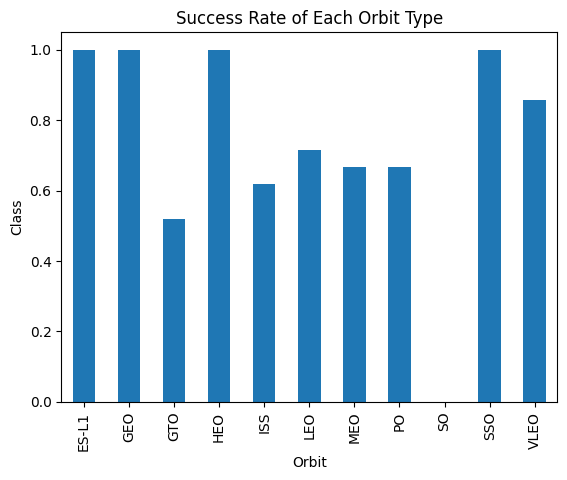

In [6]:
df_bar = df.groupby(['Orbit'])['Class'].mean()
df_bar.plot(kind = 'bar')
plt.xlabel('Orbit')
plt.ylabel('Class')
plt.title('Success Rate of Each Orbit Type')
plt.show()

Orbits `ES-L1`, `GEO`, `HEO`, and `SSO` have the highest success rate.

5. To identify the relationship of `FlightNumber` and `Orbit` type, a scatter chart can be plotted with the `Class` value hue.

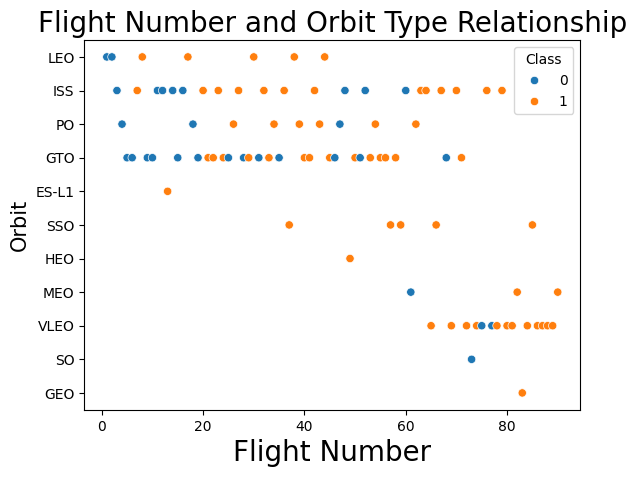

In [ ]:
sns.scatterplot(y='Orbit', x='FlightNumber', hue='Class', data=df)
plt.xlabel('Flight Number', fontsize=20)
plt.ylabel('Orbit', fontsize=15)
plt.title('Flight Number and Orbit Type Relationship', fontsize = 20)
plt.show()

The `LEO` orbit the success rate appears related to the number of flights; on the other hand, there seems to be no relationship between flight number in `GTO` orbit.


6. A scatter chart can be plotted for the `PayloadMass` with the `Orbit` type to identify the success rate.

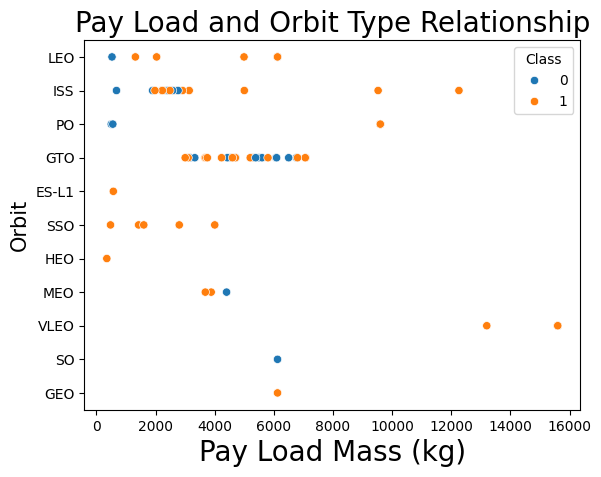

In [ ]:
sns.scatterplot(y='Orbit', x='PayloadMass', hue='Class', data=df)
plt.xlabel('Pay Load Mass (kg)', fontsize=20)
plt.ylabel('Orbit', fontsize=15)
plt.title('Pay Load and Orbit Type Relationship', fontsize = 20)
plt.show()

For heavier payloads, successful landings are more common in `PO`, `LEO`, and `ISS` orbits. Successful landings are also frequent for lighter payloads, particularly for missions targeting `ES-L1`, `SSO`, and `HEO` orbits. However, for `GTO` missions, the outcomes are mixed, with both successful and unsuccessful landings observed across different payload masses.

7. A line plot can be used to visualize the yearly launch success trend.

In [ ]:
#create a function to extract years from the date 
year=[]
def Extract_year():
    for i in df["Date"]:
        year.append(i.split("-")[0])
    return year
Extract_year()
df['Date'] = year
df.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010,Falcon 9,6123.547647,LEO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012,Falcon 9,525.000000,LEO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013,Falcon 9,677.000000,ISS,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013,Falcon 9,3170.000000,GTO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


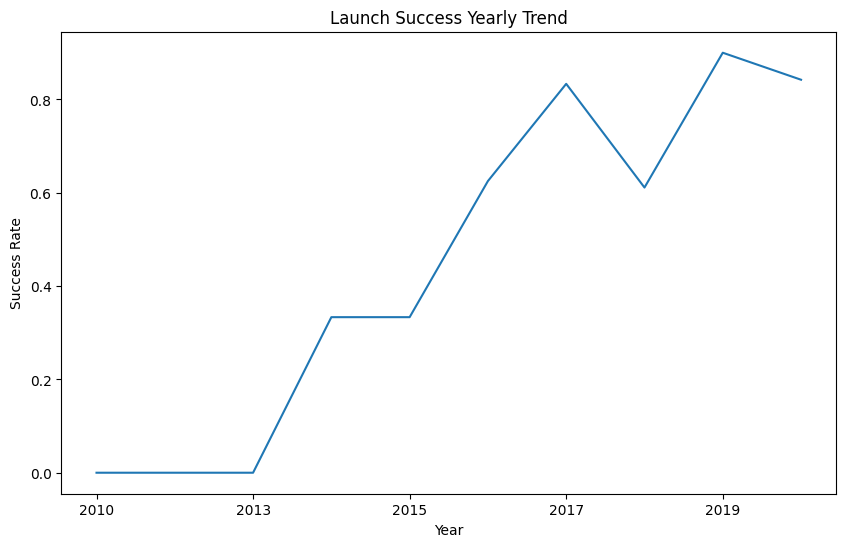

In [10]:
#plot line chart
df_success_yearly = df.groupby(['Date'])['Class'].mean()
df_success_yearly.plot(kind='line', figsize=(10, 6))
plt.xlabel('Year') 
plt.ylabel('Success Rate')
plt.title('Launch Success Yearly Trend')
plt.show()

The sucess rate since 2013 kept increasing till 2020.

## Feature Engineering

It can be identified that only some variables affect landing success rate, including `FlightNumber`, `PayloadMass`, `Orbit`, `LaunchSite`, `Flights`, `GridFins`, `Reused`, `Legs`, `LandingPad`, `Block`, `ReusedCount`, `Serial`. A new dataframe containing only these features will be used for the machine learning predictions later.

In [11]:
#feature selection
features = df[['FlightNumber', 'PayloadMass', 'Orbit', 'LaunchSite', 'Flights', 'GridFins', 'Reused', 'Legs', 'LandingPad', 'Block', 'ReusedCount', 'Serial']]
features.head()

,FlightNumber,PayloadMass,Orbit,LaunchSite,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial
0,1,6123.547647,LEO,CCSFS SLC 40,1,False,False,False,NaN,1.0,0,B0003
1,2,525.000000,LEO,CCSFS SLC 40,1,False,False,False,NaN,1.0,0,B0005
2,3,677.000000,ISS,CCSFS SLC 40,1,False,False,False,NaN,1.0,0,B0007
3,4,500.000000,PO,VAFB SLC 4E,1,False,False,False,NaN,1.0,0,B1003
4,5,3170.000000,GTO,CCSFS SLC 40,1,False,False,False,NaN,1.0,0,B1004


In [12]:
#one hot encoder of categorical columns
features_one_hot=pd.get_dummies(features, columns=['Orbit','LaunchSite', 'LandingPad', 'Serial', 'GridFins', 'Reused', 'Legs'])
features_one_hot

,FlightNumber,PayloadMass,Flights,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,Orbit_GTO,Orbit_HEO,Orbit_ISS,...,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062,GridFins_False,GridFins_True,Reused_False,Reused_True,Legs_False,Legs_True
0,1,6123.547647,1,1.0,0,False,False,False,False,False,...,False,False,False,False,True,False,True,False,True,False
1,2,525.000000,1,1.0,0,False,False,False,False,False,...,False,False,False,False,True,False,True,False,True,False
2,3,677.000000,1,1.0,0,False,False,False,False,True,...,False,False,False,False,True,False,True,False,True,False
3,4,500.000000,1,1.0,0,False,False,False,False,False,...,False,False,False,False,True,False,True,False,True,False
4,5,3170.000000,1,1.0,0,False,False,True,False,False,...,False,False,False,False,True,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,86,15600.000000,2,5.0,12,False,False,False,False,False,...,False,False,True,False,False,True,False,True,False,True
86,87,15600.000000,3,5.0,13,False,False,False,False,False,...,True,False,False,False,False,True,False,True,False,True
87,88,15600.000000,6,5.0,12,False,False,False,False,False,...,False,False,False,False,False,True,False,True,False,True
88,89,15600.000000,3,5.0,12,False,False,False,False,False,...,False,False,True,False,False,True,False,True,False,True


In [13]:
#change all numeric columns to float type
features_one_hot = features_one_hot.astype('float64')
features_one_hot.head()

,FlightNumber,PayloadMass,Flights,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,Orbit_GTO,Orbit_HEO,Orbit_ISS,...,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062,GridFins_False,GridFins_True,Reused_False,Reused_True,Legs_False,Legs_True
0,1.0,6123.547647,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,2.0,525.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,3.0,677.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,4.0,500.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,5.0,3170.000000,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


In [14]:
features_one_hot.to_csv('CleanedandFeatureEngineeredData.csv', index = False)